In [51]:
# vital imports
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FloatSlider, IntSlider, interact, Label

from c_hyti_proc import *

%matplotlib inline

In [52]:
hyti=c_hyti_proc(324,256)
datadir='/Users/hg/workdir/hyti_proc_notebook/data/'
# bb files only 1 needed to ensure wavecals are within bounds of
# camera response cal
bb90=datadir+'TIR-180924120627-bb90-scan.bsqmn'
# wavecals - read in all 3  
wc_9724=datadir+'wc_9724'
wc_113=datadir+'wc_113'
wc_8938=datadir+'wc_8938'



In [53]:
# flatten everything
bb90_flatten = hyti.extract_flatten(bb90)
wc_9724_flatten=hyti.extract_flatten(wc_9724)
wc_113_flatten=hyti.extract_flatten(wc_113)
wc_8938_flatten=hyti.extract_flatten(wc_8938)



In [54]:
def update_proccolumn(inarr,starts,startcol):
    bb90_left=inarr[:,startcol]
    bb90_leftzm=hyti.sp_interpolate(bb90_left,8)
    bb90_leftseg=hyti.extract(bb90_leftzm,8,starts,200)
    # and process
    outarr_proc=hyti.proc_tircis(bb90_leftseg,0)
    return outarr_proc

In [55]:
# process and plot all 4 files

36.75
33.625
29.25


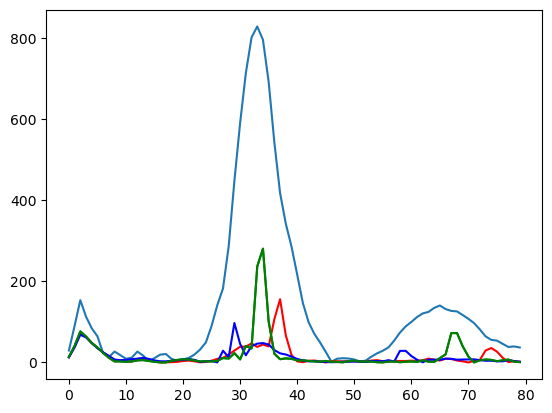

In [56]:
bb90_proc=update_proccolumn(bb90_flatten, 36.2, 160)
wc_9724_proc=update_proccolumn(wc_9724_flatten, 36.2, 160)
wc_113_proc=update_proccolumn(wc_113_flatten, 36.4, 160)
wc_8938_proc=update_proccolumn(wc_8938_flatten, 36.2, 160)
peaklocs=np.zeros(3,dtype=np.float32)
cwn=np.zeros(3,dtype=np.float32)
plt.plot(bb90_proc[0:80])
plt.plot(wc_8938_proc[0:80],'r')
plt.plot(wc_9724_proc[0:80],'g')
plt.plot(wc_113_proc[0:80],'b')
big=hyti.sp_interpolate(wc_8938_proc[0:80],8)
maxloc=np.argmax(big)/8.
print(maxloc)
peaklocs[0]=maxloc
cwn[0]=10000./8.938
plt.plot(wc_9724_proc[0:80],'g')
big=hyti.sp_interpolate(wc_9724_proc[0:80],8)
maxloc=np.argmax(big)/8.
print(maxloc)
peaklocs[1]=maxloc
cwn[1]=10000./9.724

big=hyti.sp_interpolate(wc_113_proc[0:80],8)
maxloc=np.argmax(big)/8.
peaklocs[2]=maxloc
cwn[2]=10000./11.3
print(maxloc)
plt.show()

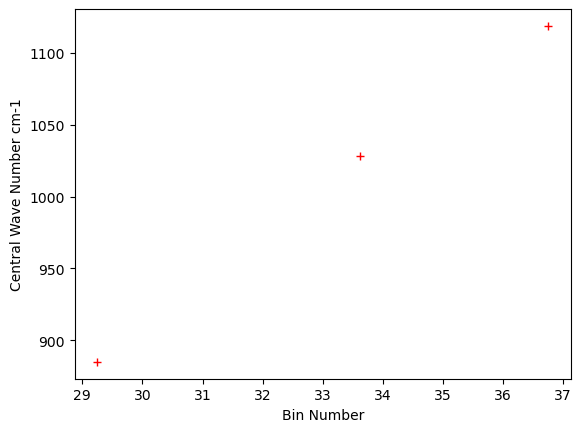

[ 31.28456359 -28.18899805]


In [59]:
# plot the peaks vs the cwn
plt.plot(peaklocs, cwn,'r+')
plt.xlabel('Bin Number')
plt.ylabel('Central Wave Number cm-1')
plt.show()
# calculate line slope and offset
pvals=np.polyfit(peaklocs,cwn,1)
print (pvals)


In [45]:
# wavelen given by equation of
print("bin\tcwn\twl(microns)")
for i in range(80):
    cwn= i*pvals[0]+pvals[1]
    wl=10000./cwn
    print(i,' ',cwn,' ',wl)
          

bin	cwn	wl(microns)
0   -28.188998049112836   -354.74833062804515
1   3.0955655439203618   3230.427480251494
2   34.380129136953556   290.86569047384637
3   65.66469272998675   152.28884175427433
4   96.94925632301995   103.14674273190445
5   128.23381991605316   77.98254786877898
6   159.51838350908636   62.68869944654616
7   190.80294710211956   52.41009193976393
8   222.08751069515276   45.02729563089411
9   253.37207428818598   39.46764862739363
10   284.6566378812191   35.13004324941397
11   315.9412014742523   31.651459047879047
12   347.2257650672855   28.799706145257385
13   378.51032866031875   26.419358318156124
14   409.7948922533519   24.402451541093374
15   441.0794558463851   22.671652164826067
16   472.3640194394183   21.1701137014364
17   503.64858303245154   19.855113936368745
18   534.9331466254848   18.69392477000712
19   566.2177102185179   17.66105125207183
20   597.5022738115512   16.736337982797274
21   628.7868374045844   15.903640797057008
22   660.071400997617